# Assignment: Making Maps with Cartopy

## 1. Global USGS Earthquakes

Load the earthquake file we explored using pandas

    http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
    
and use the data to recreate this map.

hints:
1. `pd.read_csv( parse_dates= , index_col=)`, 
1. `nlargest()` can take two arguments: n (the number of largest things you want), and 'acolumn' (the column you want to sort by)
1. `ccrs.Robinson?` to see some relevant options
1. scatter has many options to control the look of dots, some useful ones might be `cmap = `, and `edgecolor = `
1. the colormap is called 'Reds'

![earthquake_map](./earthquake_map.png)

In [2]:
# import pandas, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy


In [3]:
# load the data

url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df = pd.read_csv(url, parse_dates=['time'], index_col='time')

df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
time,,,,,,,,,,,,,,
2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [4]:
# create a new dataframe with the 50 largest earthquakes
df_50 = df.sort_values(by='mag', ascending=False).head(50)

In [5]:
# check out the options for the Robinson projection
ccrs.Robinson?

Init signature:
ccrs.Robinson(
    central_longitude=0,
    globe=None,
    false_easting=None,
    false_northing=None,
)
Docstring:     
A Robinson projection.

This projection is pseudocylindrical, and a compromise that is neither
equal-area nor conformal. Parallels are unequally-spaced straight lines,
and meridians are curved lines of no particular form.

It is commonly used for "visually-appealing" world maps.
Init docstring:
Parameters
----------
central_longitude: float, optional
    The central longitude. Defaults to 0.
false_easting: float, optional
    X offset from planar origin in metres. Defaults to 0.
false_northing: float, optional
    Y offset from planar origin in metres. Defaults to 0.
globe: :class:`cartopy.crs.Globe`, optional
    If omitted, a default globe is created.

    .. note::
        This projection does not handle elliptical globes.
File:           c:\users\csmit\miniconda3\envs\swbc2024\lib\site-packages\cartopy\crs.py
Type:           ABCMeta
Subclasses: 

C:\Users\csmit\Miniconda3\envs\swbc2024\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


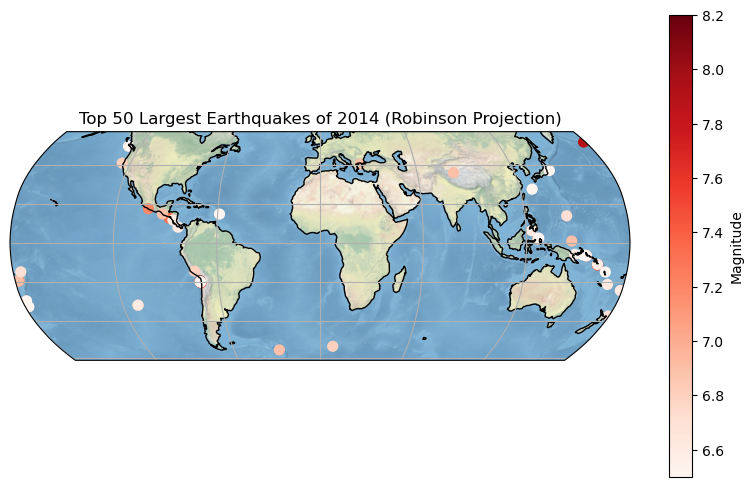

In [8]:
# make your map
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

sc = ax.scatter(
    df_50['longitude'], df_50['latitude'],
    c=df_50['mag'], cmap='Reds', s=50,  
    transform=ccrs.PlateCarree(), marker='o'
)

ax.coastlines()
ax.gridlines()
ax.stock_img()

plt.colorbar(sc, label='Magnitude')
ax.set_title('Top 50 Largest Earthquakes of 2014 (Robinson Projection)')
plt.show()

## 2. SST and Sea Ice thickness

A daily 1/4 degree SST and Sea ice product is available from NOAA:
https://www.ncdc.noaa.gov/oisst

Using the link to their THREDDS data server:
```python
url = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/201912/oisst-avhrr-v02r01.20191201.nc'
```

and the tools you know, try to recreate the following figure:

![sst_seaice.png](./sst_seaice.png)


In [ ]:
# imports 


In [9]:
# open the dataset
url = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/201912/oisst-avhrr-v02r01.20191201.nc'
ds = xr.open_dataset(url)
ds

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 1, lat: 720, lon: 1440, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-12-01T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * zlev     (zlev) float32 4B 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 4MB ...
    err      (time, zlev, lat, lon) float32 4MB ...
    ice      (time, zlev, lat, lon) float32 4MB ...
    sst      (time, zlev, lat, lon) float32 4MB ...
Attributes: (12/38)
    source:                          ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pa...
    naming_authority:                gov.noaa.ncei
    cdm_data_type:                   Grid
    date_modified:                   2020-02-10T17:10:00Z
    date_created:                    2020-02-10T17:10:00Z
    processing_level:                NOAA Level 4
    ...                              ...
    summary:                         NOAAs 1/4-degree Daily Optimum Interpola...
    product_version:                 Version v02r01
    platform:                        Ships, buoys, Argo floats, MetOp-A, MetOp-B
    comment:                         Data was converted from NetCDF-3 to NetC...
    id:                              oisst-avhrr-v02r01.20191201.nc
    DODS_EXTRA.Unlimited_Dimension:  time

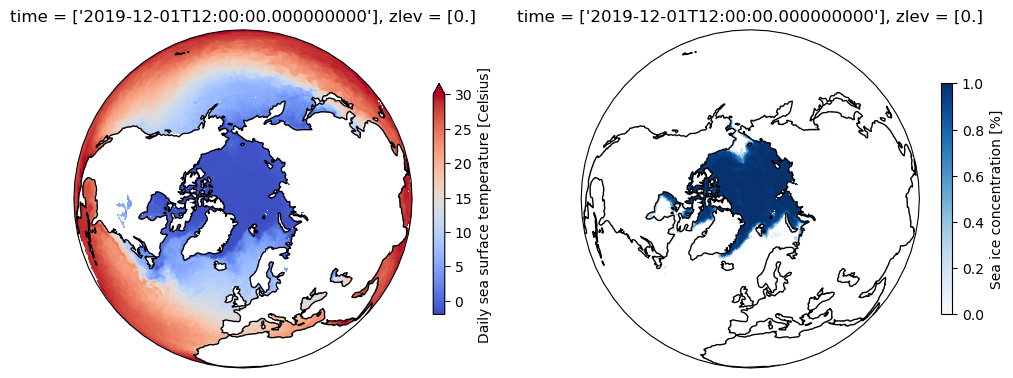

In [12]:
# build the figure

fig = plt.figure(figsize=(12, 6))

#Sea Surface Temperature (SST)
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(central_latitude=90))
sst_plot = ds.sst.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    cbar_kwargs={'label': 'Daily sea surface temperature [Celsius]', 'shrink': 0.5},
    vmax=30, vmin=-2 
)
ax1.coastlines()
ax1.set_title(f"time = {ds.time.values}, zlev = {ds.zlev.values}")

# Sea Ice Concentration
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(central_latitude=90))
ice_plot = ds.ice.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='Blues',
    cbar_kwargs={'label': 'Sea ice concentration [%]', 'shrink': 0.5},
    vmax=1, vmin=0
)
ax2.coastlines()
ax2.set_title(f"time = {ds.time.values}, zlev = {ds.zlev.values}")

plt.show()
